In [78]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wf
import scipy.signal as sig
from scipy import integrate as inte
from scipy import fft

In [125]:
picpath = 'test.jpg'
img_cv = cv2.imread(picpath)

dt = 1 / 1000  #1ms
T = 6.4
t = np.arange(0, T, dt)
d_tau = 1/10#10 Sign per second

l = int(T/d_tau)

In [126]:
l

64

In [127]:
def sin_singal(freq, phi=0):
    return np.cos(2 * np.pi * (freq * t + phi))

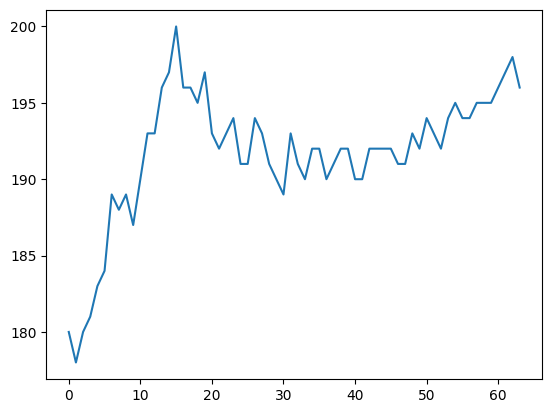

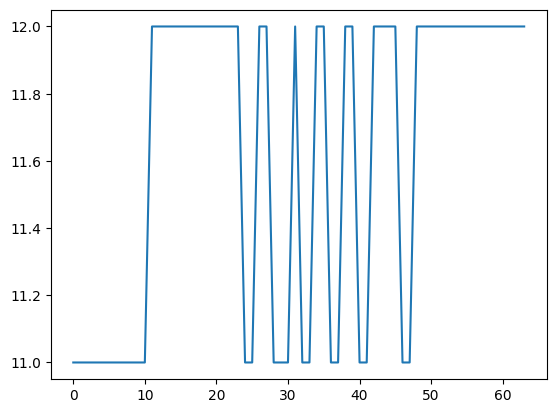

In [128]:
slide = img_cv[1000,0:l,0]
plt.plot(slide)
plt.show()
dslide = slide
for i in range(0,l):
    dslide[i] = slide[i]/256*16
plt.plot(dslide)
plt.show()

In [129]:
data = np.empty([4*l], dtype = int) 
for i in range(0, l):
    n = dslide[i]
    data[4*i] = n%2
    n = n//2
    data[4*i+1] = n%2
    n = n//2
    data[4*i+2] = n%2
    n = n//2
    data[4*i+3] = n%2

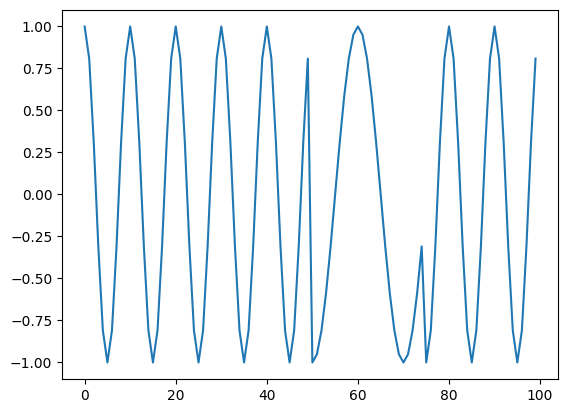

In [138]:
Hfreq = 100
Lfreq = 50
Hsig = sin_singal(freq=Hfreq)
Lsig = sin_singal(freq=Lfreq,phi=1)
fsk_sig =np.empty(len(t))
for i in range(0, len(t)):
    
    if data[int(i/len(t)*l*4)]:
        fsk_sig[i] = Hsig[i]
    else:
        fsk_sig[i] = Lsig[i]
plt.plot(fsk_sig[0:100])
plt.show()

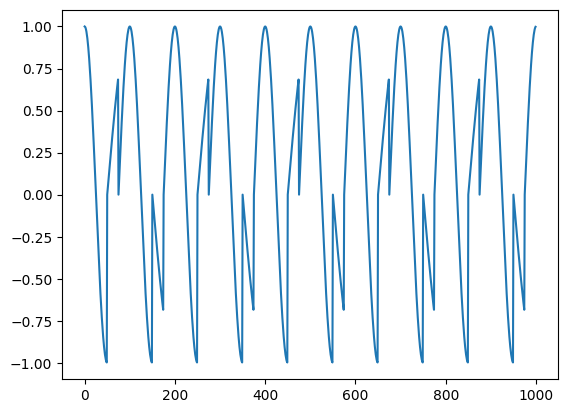

In [50]:
bit_stream = np.empty(frame_px*px_bit) 
for i in range(0, frame_px):
    n = d_img_data[i]
    bit_stream[4*i] = n%2
    n = n//2
    bit_stream[4*i+1] = n%2
    n = n//2
    bit_stream[4*i+2] = n%2
    n = n//2
    bit_stream[4*i+3] = n%2

In [51]:
#fsk_encode
Hfreq = 1000
Lfreq = 500
Hsig = sin_singal(freq=Hfreq)
Lsig = sin_singal(freq=Lfreq)
fsk_sig =np.empty(len(t))
for i in range(0, len(t)):
    if bit_stream[int(i*dt/T*frame_px*px_bit)]:
        fsk_sig[i] = Hsig[i]
    else:
        fsk_sig[i] = Lsig[i]
fsk_audio = np.zeros_like(fsk_sig, dtype=np.uint8)
for i in range(0, len(t)):
    fsk_audio[i] = int((fsk_sig[i]+1)*127)
wf.write("fsk_out.wav", int(1/dt), fsk_audio)